This project is a Binary Classification Machine Learning problem.
Binary Classification refers to those classification tasks that have two class labels.
Popular algorithms that can be used for binary classification include:

1. Logistic Regression
2. k-Nearest Neighbors
3. Decision Trees
4. Support Vector Machine
5. Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, minmax_scale
import seaborn as sns
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

In [71]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [72]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [73]:
train.shape,test.shape

((54808, 14), (23490, 13))

In [74]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [75]:
train["source"] = "train"
test["source"] = "test"
data = pd.concat([train,test],ignore_index = True)

## Missing value

In [76]:
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
source                      0
dtype: int64

In [77]:
data["education"].value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [78]:
data["previous_year_rating"].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

replacing nan with mode of both categorical features

In [79]:
data["education"].fillna("Bachelor's", inplace = True)
data["previous_year_rating"].fillna(3.0, inplace = True)

In [80]:
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
source                      0
dtype: int64

Label and Hot Encoding

In [81]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
source                   object
dtype: object

In [82]:
data.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train


I will separate the numerical and categoriical features

### categorical and numerical columns

In [83]:
cat_feat = ["department","education","gender","KPIs_met >80%","awards_won?","is_promoted"]
num_feat = ["no_of_trainings","age","length_of_service","avg_training_score"]

In [84]:
data[cat_feat] = data[cat_feat].astype("category")

## Feature Engineering

### Label Encoding

In [85]:
cols = ["gender","KPIs_met >80%","awards_won?","is_promoted"]

In [86]:
for columns in cols:
    data[columns] = data[columns].cat.codes

In [87]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0,train
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0,train
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0,train
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0,train
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0,train


## We have few features which are irrelevant , we will drop those features from data
1. Employee ID
2. Recruitment channel
3. region

In [88]:
data.drop(["region","recruitment_channel"], axis = 1, inplace = True)

In [89]:
data.head(2)

,employee_id,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,source
0,65438,Sales & Marketing,Master's & above,0,1,35,5.0,8,1,0,49,0,train
1,65141,Operations,Bachelor's,1,1,30,5.0,4,0,0,60,0,train


## One Hot Coding
In One Hot Coding, we dont need to apply it on binary categorical features.

In [90]:
data = pd.get_dummies(data, columns=["department","education"], drop_first = True)

In [91]:
data.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above
0,65438,0,1,35,5.0,8,1,0,49,0,...,0,0,0,0,0,0,1,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0,...,0,0,0,1,0,0,0,0,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,...,0,0,0,0,0,0,1,0,0,0
3,2542,1,2,39,1.0,10,0,0,50,0,...,0,0,0,0,0,0,1,0,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
data.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'source',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', 'education_Master's & above'],
      dtype='object')

In [93]:
data.dtypes

employee_id                       int64
gender                             int8
no_of_trainings                   int64
age                               int64
previous_year_rating            float64
length_of_service                 int64
KPIs_met >80%                      int8
awards_won?                        int8
avg_training_score                int64
is_promoted                        int8
source                           object
department_Finance                uint8
department_HR                     uint8
department_Legal                  uint8
department_Operations             uint8
department_Procurement            uint8
department_R&D                    uint8
department_Sales & Marketing      uint8
department_Technology             uint8
education_Below Secondary         uint8
education_Master's & above        uint8
dtype: object

## Data Normalization
We need to normalize numerical features, I will use minmax method

In [94]:
data["avg_training_score"].min(), data["avg_training_score"].max()

(39, 99)

In [95]:
data["no_of_trainings"].min(), data["no_of_trainings"].max()

(1, 10)

In [96]:
data["length_of_service"].min(), data["length_of_service"].max()

(1, 37)

We can see the above numerical data is in the range of 1- 100 so, I will use minmax method for Data normalization

In [97]:
data[num_feat] = minmax_scale(data[num_feat],feature_range=(1,100))

In [98]:
data.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above
0,65438,0,1.0,38.125,5.0,20.25,1,0,17.50,0,...,0,0,0,0,0,0,1,0,0,1
1,65141,1,1.0,25.750,5.0,9.25,0,0,35.65,0,...,0,0,0,1,0,0,0,0,0,0
2,7513,1,1.0,35.650,3.0,17.50,0,0,19.15,0,...,0,0,0,0,0,0,1,0,0,0
3,2542,1,12.0,48.025,1.0,25.75,0,0,19.15,0,...,0,0,0,0,0,0,1,0,0,0
4,48945,1,1.0,62.875,3.0,3.75,0,0,57.10,0,...,0,0,0,0,0,0,0,1,0,0


### Correlation

In [64]:
corr = data.corr()

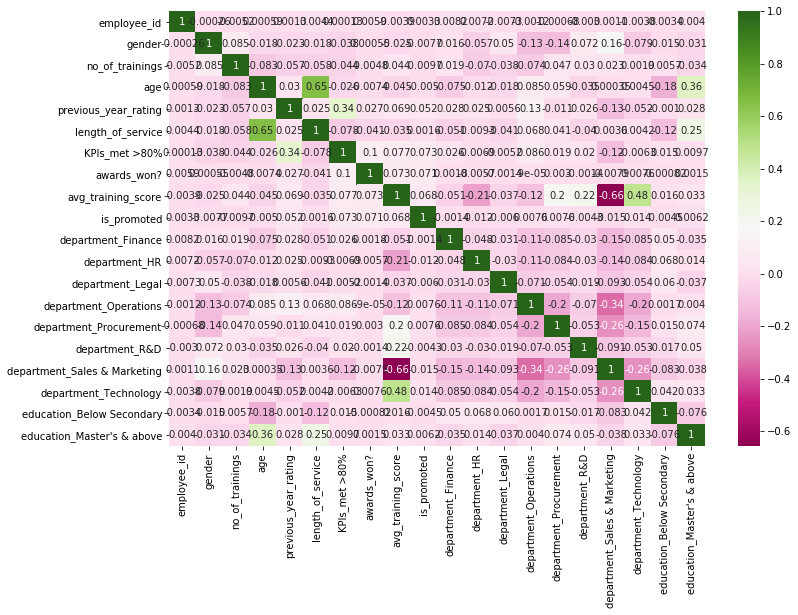

In [65]:
plt.figure(figsize = (12,8))
sns.heatmap(corr,annot = True,cmap="PiYG")
plt.show()

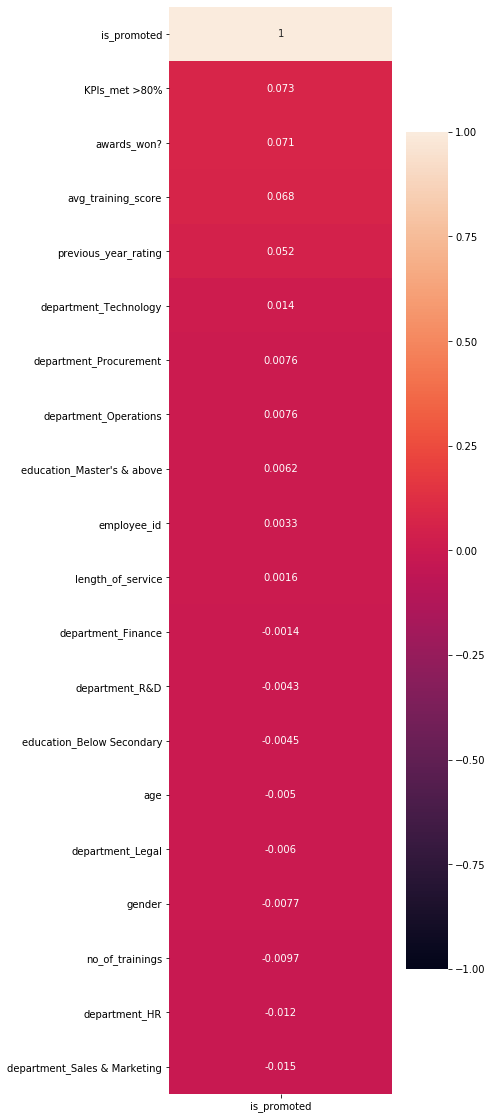

In [66]:
plt.figure(figsize = (5,20))
sns.heatmap(corr[["is_promoted"]].sort_values(by = "is_promoted", ascending = False).head(20),vmin = -1, annot = True)
plt.show()

Highly correlated numerical data are 
1. KPI met
2. awards won
3. avg training score
4. previous year rating

Now, we also saw that few features are hihly correlated with each other : 
1. Length of service and age
2. previous year rating and KPI met

According to the problem statement we already know how promotion depends of following fearures:
1. Previous year rating
2. Average training score and no of trainings
3. KPI met > 60 then yes else no.

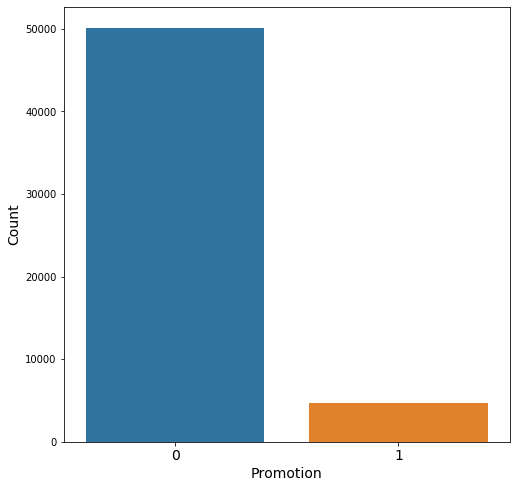

In [99]:
plt.figure(figsize = (8,8))
sns.countplot(x="is_promoted",data = train)
plt.xlabel("Promotion",fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.xticks(fontsize = 14)
plt.show()

In [100]:
train.shape, train["is_promoted"].value_counts()

((54808, 15),
 0    50140
 1     4668
 Name: is_promoted, dtype: int64)

### We can see above that the data set is imbalanced, the promoted data is only 8% here, so we need to do data sampling.

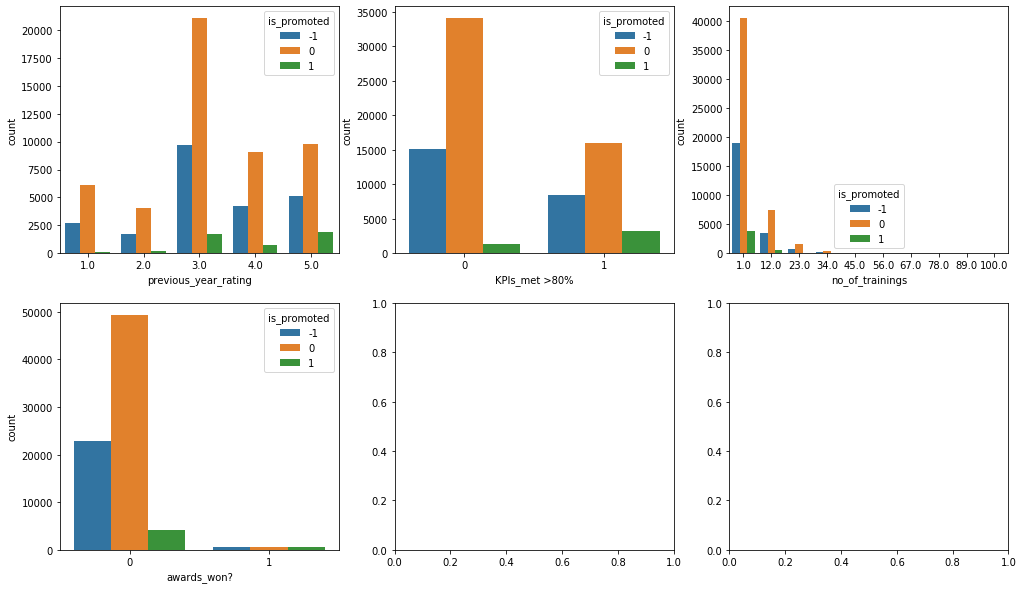

In [102]:
f, axes = plt.subplots(ncols=3,nrows = 2,figsize=(17,10))
sns.countplot(x = "previous_year_rating",hue = "is_promoted",ax = axes[0][0],data = data)
sns.countplot(x = "KPIs_met >80%",hue = "is_promoted",ax = axes[0][1],data = data)
sns.countplot(x = "no_of_trainings",hue = "is_promoted",ax = axes[0][2],data = data)
sns.countplot(x = "awards_won?",hue = "is_promoted",ax = axes[1][0],data = data)
plt.show()

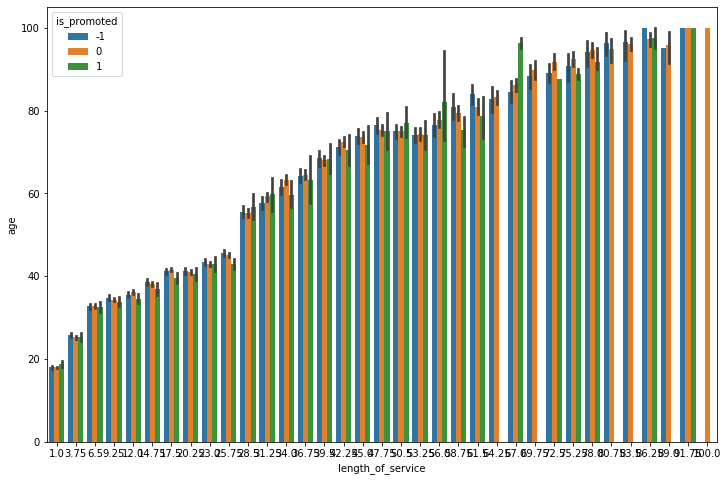

In [103]:
plt.figure(figsize = (12,8))
sns.barplot(x = "length_of_service",y = "age", hue = "is_promoted", data = data)
plt.show()

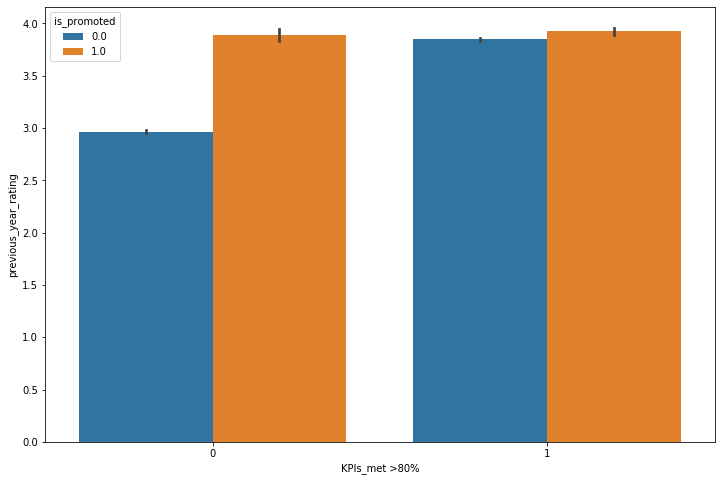

In [48]:
plt.figure(figsize = (12,8))
sns.barplot(x = "KPIs_met >80%",y = "previous_year_rating", hue = "is_promoted", data = data)
plt.show()

In [104]:
promoted_yes = data[data["is_promoted"] == 1]
promoted_no = data[data["is_promoted"] == 0]

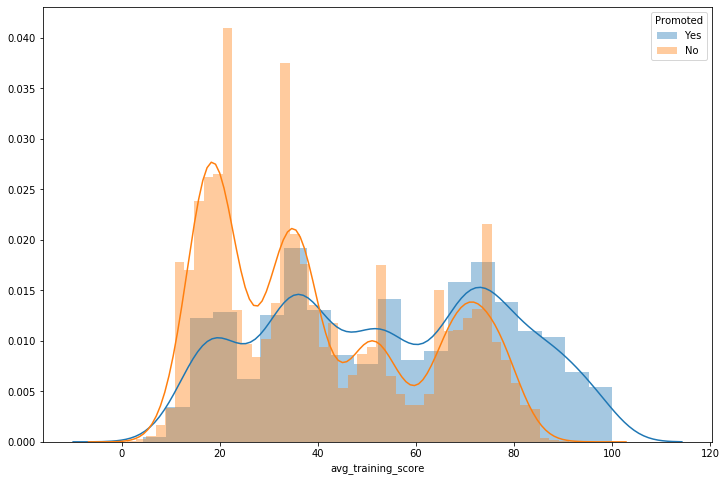

In [105]:
plt.figure(figsize = (12,8))
sns.distplot(promoted_yes["avg_training_score"],label = "Yes",kde = True)
sns.distplot(promoted_no["avg_training_score"],label = "No",kde = True)
plt.legend(title='Promoted',loc='best')
plt.show()

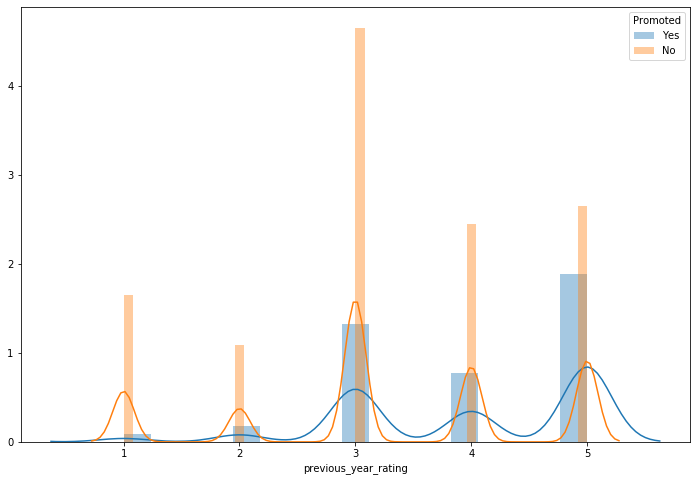

In [49]:
plt.figure(figsize = (12,8))
sns.distplot(promoted_yes["previous_year_rating"],label = "Yes",kde = True)
sns.distplot(promoted_no["previous_year_rating"],label = "No",kde = True)
plt.legend(title='Promoted',loc='best')
plt.show()

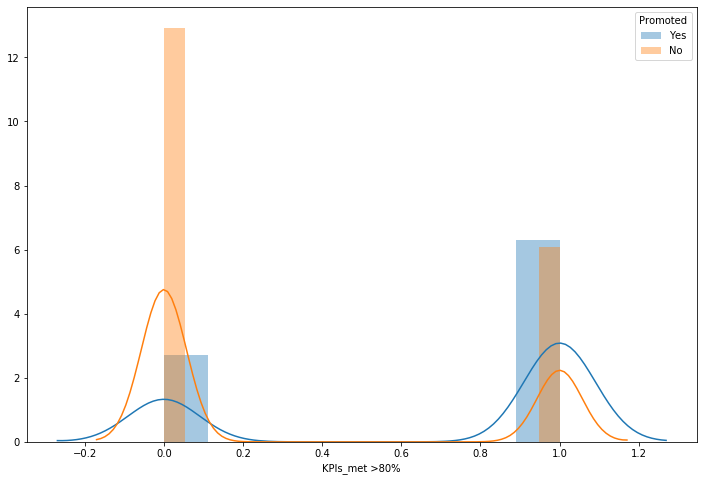

In [42]:
plt.figure(figsize = (12,8))
sns.distplot(promoted_yes["KPIs_met >80%"],label = "Yes",kde = True)
sns.distplot(promoted_no["KPIs_met >80%"],label = "No",kde = True)
plt.legend(title='Promoted',loc='best')
plt.show()

In [106]:
data.to_csv("clean_data.csv", index = False)

In [107]:
data = pd.read_csv("clean_data.csv")

## Under sampling and CV

In [108]:
train = data.loc[data["source"]== "train"]
test = data.loc[data["source"]== "test"]

In [109]:
train.shape, test.shape

((54808, 21), (23490, 21))

In [110]:
train.drop(["source"],axis = 1,inplace = True)
test.drop(["source","is_promoted"],axis = 1,inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [112]:
IDcol = "employee_id"
target = "is_promoted"

In [114]:
features = [x for x in train.columns if x not in [target]+[IDcol]]

Split the data into train test

In [117]:
X = train[features].values
y = train[target]

In [118]:
X.shape,y.shape

((54808, 18), (54808,))

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify = y)

In [120]:
X_train.shape,y_train.shape

((43846, 18), (43846,))

In [121]:
y_train.value_counts(), y_test.value_counts()

(0    40112
 1     3734
 Name: is_promoted, dtype: int64,
 0    10028
 1      934
 Name: is_promoted, dtype: int64)

### Resampling - RandomUnderSampler only X_train,y_train

In [122]:
rus = RandomUnderSampler(random_state = 1234)
X_rus,y_rus = rus.fit_sample(X_train,y_train)

In [123]:
y_rus.value_counts()

1    3734
0    3734
Name: is_promoted, dtype: int64

In [124]:
X_rus.shape,y_rus.shape

((7468, 18), (7468,))

In [125]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report,f1_score

Now, we have under sampled the X train and the shape of the data reduced. No we will apply Cross validation and model selection on this X_rus and y_rus

## GridSearchCV

I wil use below models for model selection:
1. Logistics Regression
2. Decision Tree classifier

In [126]:
def model_score(name,est,param,X_train,y_train,X_test,y_test):
    grid = GridSearchCV(estimator= est,param_grid = param,cv = 5,verbose = 5,n_jobs = 3,scoring='f1')
    results = grid.fit(X_train,y_train)
    print("Model Name ",name,"\n")
    print("Best Score of ",results.best_score_,"for Best parameters are \n",results.best_params_, )
    
    model = results.best_estimator_
    fit = model.fit(X_train,y_train)
    pred = fit.predict(X_test)
    f1 = f1_score(y_test,pred,average = 'weighted')
    print("\n F1 score for ",name," : ",f1)
    
    return(model)

In [127]:
lrc = LogisticRegression(random_state=1234)
dtc = DecisionTreeClassifier(random_state=1234)
rfc = RandomForestClassifier(random_state = 1234)

In [128]:
rfc_param = {'n_estimators':[10,15,20], 
            'min_samples_split':[8,16],
            'min_samples_leaf':[1,2,3,4,5]}
lrc_param = {'C':[0.01, 0.1, 0.5, 1, 2, 5, 10], 
            'penalty':['l2'],
            'solver':['liblinear','lbfgs', 'saga']
            }
dtc_param = {'max_depth':[5,10,15],'min_samples_leaf':[20,50,100]}

In [129]:

model_Logistic = model_score("Logistic",lrc,lrc_param,X_rus,y_rus,X_test,y_test)



Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   13.6s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   18.4s


Model Name  Logistic 

Best Score of  0.8011533330920886 for Best parameters are 
 {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

 F1 score for  Logistic  :  0.803023118120903


[Parallel(n_jobs=3)]: Done 105 out of 105 | elapsed:   22.4s finished


In [21]:
model_Decision = model_score("Decision Tree",dtc,dtc_param,X_rus,y_rus,X_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.5s


Model Name  Decision Tree 

Best Score of  0.8160059574554612 for Best parameters are 
 {'max_depth': 10, 'min_samples_leaf': 20}

 F1 score for  Decision Tree  :  0.7866041464005833


[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:    1.1s finished


In [22]:
model_RandomForest = model_score("Random Forest",rfc,rfc_param,X_rus,y_rus,X_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    5.5s
[Parallel(n_jobs=3)]: Done 150 out of 150 | elapsed:   12.0s finished


Model Name  Random Forest 

Best Score of  0.8250399826372057 for Best parameters are 
 {'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 20}

 F1 score for  Random Forest  :  0.7797641537392312


Now, we can see the best model with highest f1 score is Logistic Regression with 0.8087

## Logistic Regression

In [130]:
lrc_final = LogisticRegression(C = 2, penalty = "l2", solver = "liblinear")

In [131]:
lrc_final.fit(X_rus,y_rus)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
lrc_pred = lrc_final.predict(X_test)

Lets create Condusion Matrix

In [133]:
cm = confusion_matrix(y_test,lrc_pred)

In [134]:
score = lrc_final.score(X_test, y_test)
cr = classification_report(y_test, lrc_pred)

In [135]:
Y_prob = lrc_final.predict_proba(X_test)[:, 1]

In [136]:
auc = roc_auc_score(y_test, Y_prob)

[[7473 2555]
 [ 159  775]]


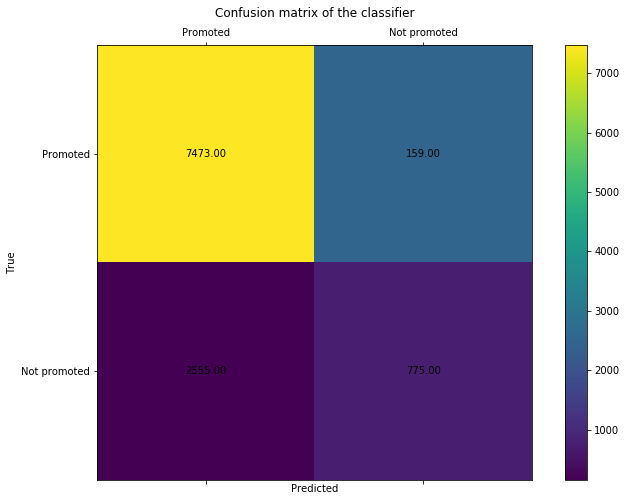

In [137]:
labels = ['Promoted','Not promoted']
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel('Predicted')
plt.ylabel('True')
print(cm)

for (x, y), value in np.ndenumerate(cm):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")
plt.show()

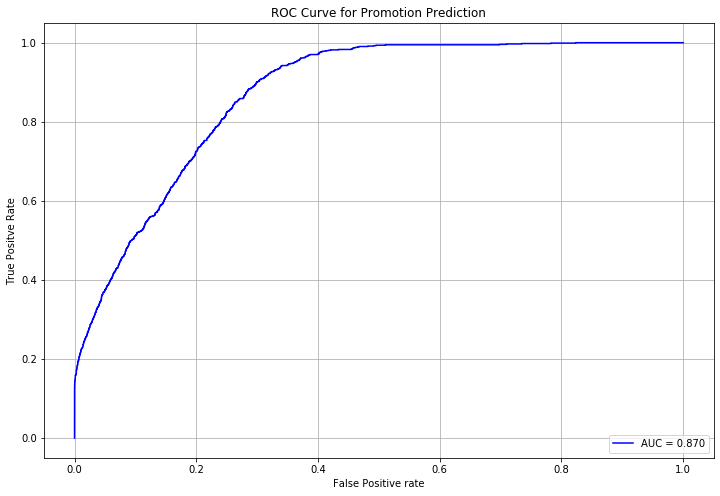

In [138]:
fpr, tpr, threshold = roc_curve(y_test, Y_prob)
plt.figure(figsize = (12,8))
#plt.plot(fpr, tpr, linewidth=4)
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% auc)
plt.legend(loc='lower right')
plt.xlabel("False Positive rate")
plt.ylabel("True Positve Rate")
plt.title("ROC Curve for Promotion Prediction")
plt.grid()

In [139]:
print("classification_report\n",cr)


classification_report
               precision    recall  f1-score   support

           0       0.98      0.75      0.85     10028
           1       0.23      0.83      0.36       934

    accuracy                           0.75     10962
   macro avg       0.61      0.79      0.60     10962
weighted avg       0.92      0.75      0.81     10962



## Test data Prediction

In [140]:
test.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above
54808,8724,1,1.0,10.900,3.0,1.00,1,0,63.7,0,0,0,0,0,0,0,1,0,0
54809,74430,0,1.0,28.225,3.0,12.00,0,0,20.8,0,1,0,0,0,0,0,0,0,0
54810,72255,1,1.0,28.225,1.0,9.25,0,0,14.2,0,0,0,0,0,0,1,0,0,0
54811,38562,0,23.0,28.225,2.0,23.00,0,0,43.9,0,0,0,0,1,0,0,0,0,0
54812,64486,1,1.0,25.750,4.0,17.50,0,0,37.3,1,0,0,0,0,0,0,0,0,0


In [141]:
test[target] = lrc_final.predict(test[features])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
test.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,is_promoted
54808,8724,1,1.0,10.900,3.0,1.00,1,0,63.7,0,0,0,0,0,0,0,1,0,0,1
54809,74430,0,1.0,28.225,3.0,12.00,0,0,20.8,0,1,0,0,0,0,0,0,0,0,0
54810,72255,1,1.0,28.225,1.0,9.25,0,0,14.2,0,0,0,0,0,0,1,0,0,0,0
54811,38562,0,23.0,28.225,2.0,23.00,0,0,43.9,0,0,0,0,1,0,0,0,0,0,0
54812,64486,1,1.0,25.750,4.0,17.50,0,0,37.3,1,0,0,0,0,0,0,0,0,0,0


In [145]:
submission = test[["employee_id","is_promoted"]]

In [146]:
submission.head()

,employee_id,is_promoted
54808,8724,1
54809,74430,0
54810,72255,0
54811,38562,0
54812,64486,0


In [148]:
submission.to_csv("submission.csv",index = False)